#### FSEOF Analysis

FSEOF analysis stands for flux scanning based on enforced objective flux. This type of analysis can indicate which reactions can be changed in flux to increase the production of the compound of interest. This is done by enforcing an increasing flux of the objective, here the ___ reaction. (skal omskrives)

In [34]:
# No necessary to run as we have saved iYO844_modified.xml already
# %run 1_incorporation_of_heterologous_genes.ipynb

In [23]:
# Loading of required packages
from cobra.io import read_sbml_model, write_sbml_model # To read the model and save new newly generated model
# from cobra import Reaction, Metabolite # To creat new reactions and metabolites NOT NECESSARY WILL DELETE THIS
from cameo.strain_design.deterministic.flux_variability_based import FSEOF # To make FSEOF analysis
import numpy as np # Arrays
from matplotlib import pyplot as plt # Plotting
from pytest import approx # using the approximation function

In [7]:
# Loading of the model
iYO844 = read_sbml_model("data/iYO844.xml")
# Observe access to modified model 
iYO844_modified

Name,iYO844
Memory address,0x07fc0a18be810
Number of metabolites,996
Number of reactions,1258
Number of groups,0
Objective expression,1.0*BIOMASS_BS_10 - 1.0*BIOMASS_BS_10_reverse_8788b
Compartments,"cytosol, extracellular space"


In [8]:
# Perform flux variability analysis on the modified model to explore and optimize the flux space of the model
fseof = FSEOF(iYO844_modified)

In [19]:
# We want to target the flux of reaction 6 called ALDH1_CYP71AV1 within the cell
fseof_result = fseof.run(target=iYO844_modified.reactions.ALDH1_CYP71AV1)
fseof_result_df = fseof_result.data_frame

pandas.core.frame.DataFrame

After running the analysis we can plot the predicted targets that shows an increase or decrease in flux when the target is set to the last reaction (reaction 6) of the artemisinin pathway (skal omskrives).

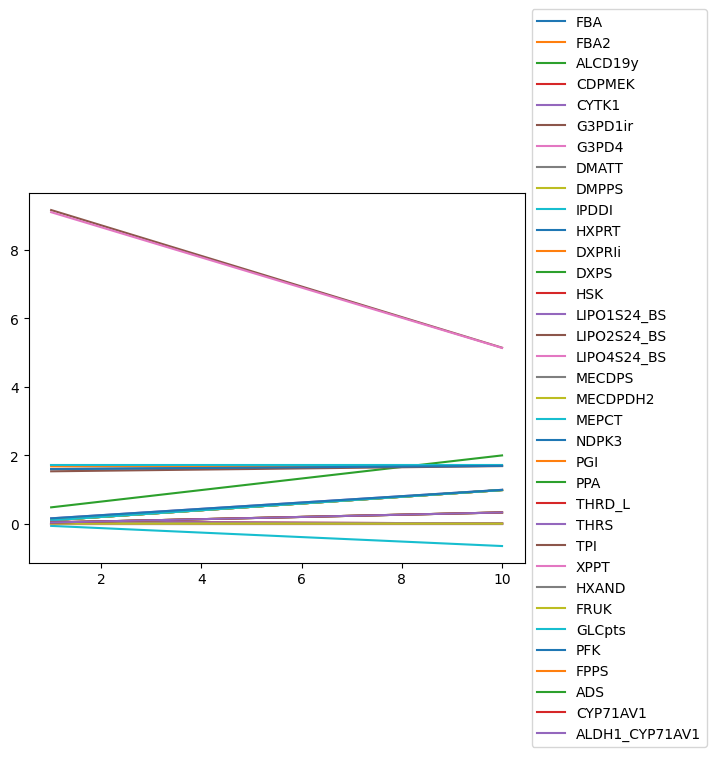

In [22]:
fseof_result_df.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# plt.get_figure().savefig("figures/FSEOF_analysis") # Saving the plot as an png file. MAKE IT WORK

To get a better overview of the results we can sort the values and remove all the ones that have a flux change of 0.0. 

In [24]:
# sorting the dataframe from highest to lowest
fseof_result_df = fseof_result_df.sort_values([1], ascending = False)
 
# Finding all the values, which are not approximatly equal to 0 hence almost no flux.
removed_zero = (fseof_result_df != approx(0.0)).all(axis=1)
fseof_result_df = fseof_result_df.loc[removed_zero] # removing genes from dataframe, which have no flux change
fseof_result_df.head() # Shows the header of the data frame

,1,2,3,4,5,6,7,8,9,10
G3PD1ir,9.161652,8.714794,8.267937,7.821079,7.374221,6.927363,6.480505,6.033647,5.586789,5.139931
G3PD4,9.098386,8.657785,8.217184,7.776584,7.335983,6.895382,6.454781,6.014181,5.573580,5.132979
GLCpts,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000
PGI,1.672989,1.675661,1.678332,1.681003,1.683675,1.686346,1.689018,1.691689,1.694360,1.697032
FBA,1.594198,1.604662,1.615126,1.625590,1.636054,1.646518,1.656982,1.667446,1.677910,1.688374


These results show 10 the enzymes that show the highest increase or decrease in flux. The whole dataframe consistes of 95 rows which means 95 reactions have a change of flux.

To get a better overview of the changes in flux and genes we can plot the in the following way.

ValueError: Invalid color ['salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon'
 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon'
 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon'
 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'salmon' 'blue'
 'blue' 'blue' 'blue']

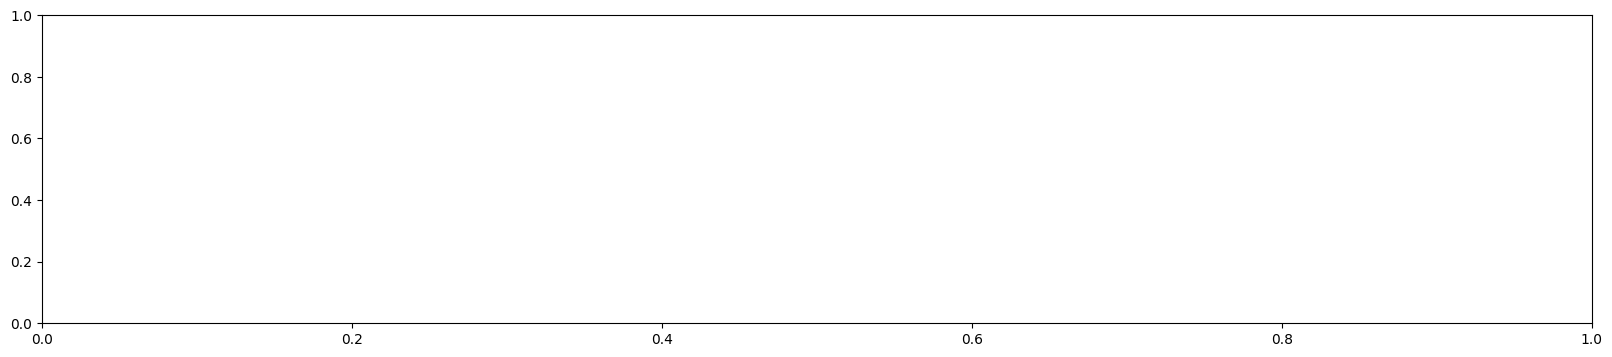

In [27]:
# I THINK WE SHOULD CHANGE THIS!
# Creating a function, which has three input variables
# returns colouring of the values in the data frame
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

# Generating a plot
fig = fseof_result_df.plot(legend=None, kind='bar', color=bar_color(fseof_result_df,'salmon','blue'),figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

We want to see what the relative change is for the different fluxes. This can be calculated like this: R = (B-A) / B +1

In [29]:
fseof_result_df['relative_change_in_flux'] = (fseof_result_df[10]-df[1])/df[10] +1

If we look at the reactions that have a higher relative_change_in_flux than 80% we can find target rections.

In [30]:
target_reactions_df = fseof_result_df[fseof_result_df['relative_change_in_flux'] > 1.8]
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
CYTK1,0.155970,0.248375,0.340780,0.433185,0.525590,0.617995,0.710400,0.802805,0.895210,0.987615,1.842074
NDPK3,0.154077,0.246669,0.339261,0.431853,0.524446,0.617038,0.709630,0.802222,0.894814,0.987407,1.843958
MECDPDH2,0.098326,0.196432,0.294538,0.392644,0.490750,0.588856,0.686962,0.785068,0.883174,0.981280,1.899798
MEPCT,0.098326,0.196432,0.294538,0.392644,0.490750,0.588856,0.686962,0.785068,0.883174,0.981280,1.899798
MECDPS,0.098326,0.196432,0.294538,0.392644,0.490750,0.588856,0.686962,0.785068,0.883174,0.981280,1.899798
DXPS,0.098326,0.196432,0.294538,0.392644,0.490750,0.588856,0.686962,0.785068,0.883174,0.981280,1.899798
CDPMEK,0.098326,0.196432,0.294538,0.392644,0.490750,0.588856,0.686962,0.785068,0.883174,0.981280,1.899798
DMPPS,0.098326,0.196432,0.294538,0.392644,0.490750,0.588856,0.686962,0.785068,0.883174,0.981280,1.899798
DXPRIi,0.098326,0.196432,0.294538,0.392644,0.490750,0.588856,0.686962,0.785068,0.883174,0.981280,1.899798
DMATT,0.032737,0.065443,0.098149,0.130855,0.163560,0.196266,0.228972,0.261678,0.294383,0.327089,1.899914


In [31]:
# removing column labeled 'relative_change_in_flux' from target_reactions_df
# CHANGE NAME OF DF: IT SAYS NOTHING OF THE VIRIABLE
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

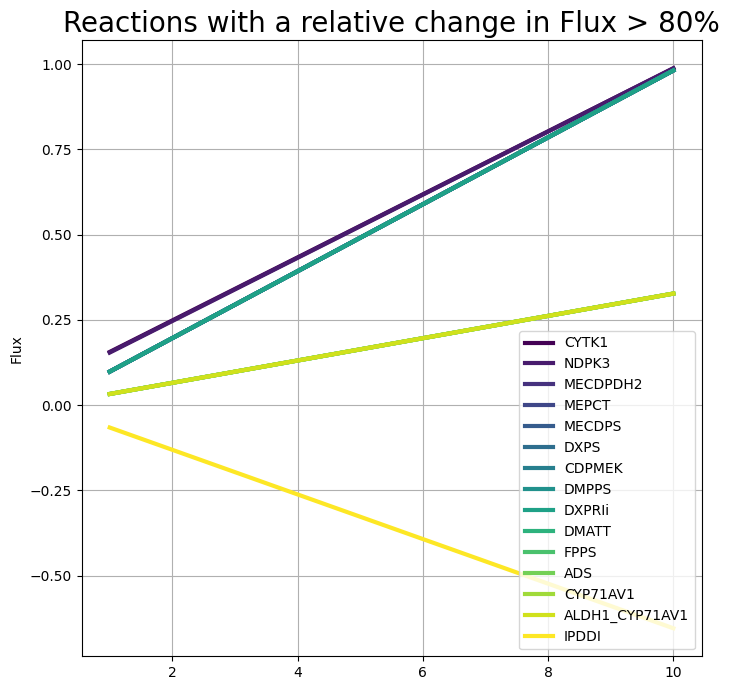

In [32]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

Comment on what was observed in figure

In [33]:
#lowest flux reactions
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
FPPS,0.032737,0.065443,0.098149,0.130855,0.163560,0.196266,0.228972,0.261678,0.294383,0.327089,1.899914
ADS,0.032709,0.065417,0.098126,0.130834,0.163543,0.196252,0.228960,0.261669,0.294377,0.327086,1.899999
CYP71AV1,0.032709,0.065417,0.098126,0.130834,0.163543,0.196252,0.228960,0.261669,0.294377,0.327086,1.899999
ALDH1_CYP71AV1,0.032709,0.065417,0.098126,0.130834,0.163543,0.196252,0.228960,0.261669,0.294377,0.327086,1.900000
IPDDI,-0.065589,-0.130989,-0.196389,-0.261789,-0.327190,-0.392590,-0.457990,-0.523390,-0.588791,-0.654191,1.899740


##### Make a "Top 10 targets for upregulation" based on the data

### Summary
##### Make summary of analysis